## Real Estate Prediction


In [1]:
import pandas as pd

In [2]:
HousingDF = pd.read_csv("Realestate.csv",sep=r'\s*,\s*')

<ipython-input-2-73739fb87a70>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  HousingDF = pd.read_csv("Realestate.csv",sep=r'\s*,\s*')


In [3]:
HousingDF.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
HousingDF = HousingDF.loc[:, ~HousingDF.columns.str.contains('^Unnamed')]

In [5]:
HousingDF.shape[1]

14

In [6]:
HousingDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       499 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
HousingDF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,499.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.286385,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.706957,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

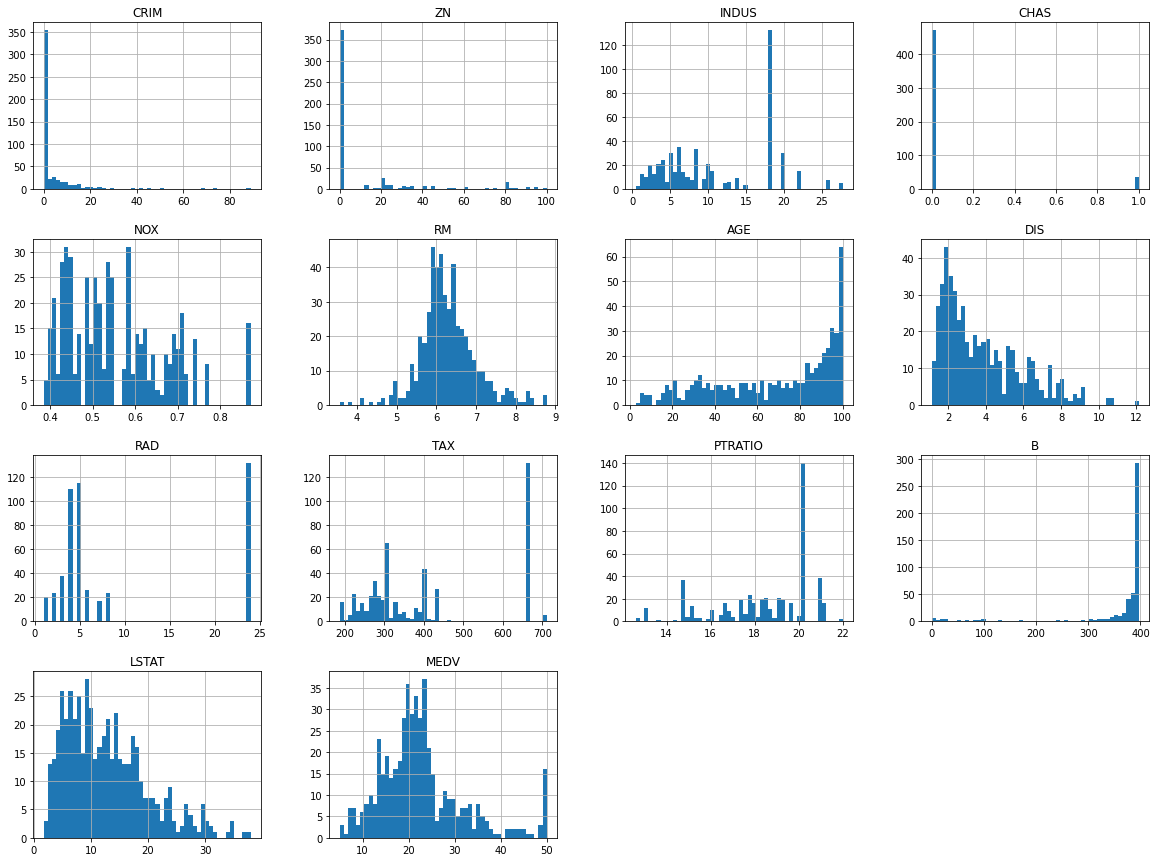

In [8]:
HousingDF.hist(bins=50,figsize=(20,15))

# #Train_Test  Split


In [9]:
import numpy as np 
def split_train_test(data,test_ratio):
    np.random.seed(30)                           #seed make sure to keep shuffled data not change every time the program is rerun
    shuffled = np.random.permutation(len(data))
   # print(shuffled)
    test_set_size = int(len(data) * test_ratio) 
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
trainset,testset = split_train_test(HousingDF,0.2)    #SPlitting the data

In [11]:
y = HousingDF['CHAS']

In [12]:
#Stratified split is done since CHAS column in categorical column
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=30)
for train_index,test_index in split.split(HousingDF,HousingDF['CHAS']):
    strat_trainset = HousingDF.loc[train_index]
    strat_testset = HousingDF.loc[test_index]

In [13]:
strat_trainset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
330,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430,16.9,368.57,9.09,19.8
474,8.05579,0.0,18.10,0,0.584,5.427,95.4,2.4298,24,666,20.2,352.58,18.14,13.8
222,0.62356,0.0,6.20,1,0.507,6.879,77.7,3.2721,8,307,17.4,390.39,9.93,27.5
59,0.10328,25.0,5.13,0,0.453,5.927,47.2,6.9320,8,284,19.7,396.90,9.22,19.6
40,0.03359,75.0,2.95,0,0.428,7.024,15.8,5.4011,3,252,18.3,395.62,1.98,34.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,3.67822,0.0,18.10,0,0.770,5.362,96.2,2.1036,24,666,20.2,380.79,10.19,20.8
10,0.22489,12.5,7.87,0,0.524,NaN,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
314,0.36920,0.0,9.90,0,0.544,6.567,87.3,3.6023,4,304,18.4,395.69,9.28,23.8
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [14]:
strat_trainset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 330 to 249
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       399 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


In [15]:
#strat_trainset['CHAS'].value_counts()

# #Correlations 


In [16]:
corr_matrix = HousingDF.corr()
corr_matrix['MEDV'].sort_values(ascending=False)
#Positives are positively correlated with MEDV

MEDV       1.000000
RM         0.696415
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

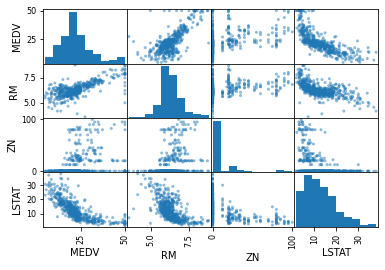

In [17]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(HousingDF[attributes])

#Diagnols have histograms of their own attributes
#All other diagrams are comparatively drawn with others

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

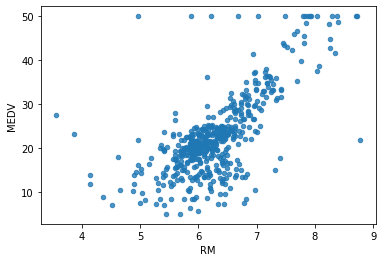

In [18]:
HousingDF.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)
#This shows strong relation i.e RM directly propotional to MEDV
#We can remove the outlier data to make the data better(eg: less RM has more MEDV)

# Attribute combinations
    

In [19]:
#we can combine RM and TAX

In [20]:
HousingDF["TAXRM"] = HousingDF["TAX"]/HousingDF["RM"]

In [21]:
HousingDF["TAXRM"]

0      45.019011
1      37.688834
2      33.681280
3      31.723350
4      31.061984
         ...    
501    41.407553
502    44.607843
503    39.134174
504    40.182514
505    45.273632
Name: TAXRM, Length: 506, dtype: float64

In [22]:
HousingDF.head(
)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


In [23]:
corr_matrix = HousingDF.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.696415
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
TAXRM     -0.541048
LSTAT     -0.737663
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

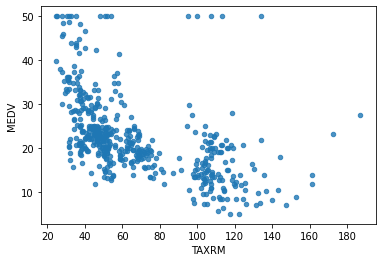

In [24]:
 HousingDF.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)

In [25]:
 HousingDF = strat_trainset.drop("MEDV",axis=1)
 HousingDF_labels = strat_trainset["MEDV"].copy()

# #Missing Attributes

In [26]:
#To take care of missing attributes, we have 3 options:
# 1. Get rid of missing data points
# 2. Get rid of whole attribute
# 3. set the value to some value(0,mean or median)

In [27]:
median = HousingDF["RM"].median()
HousingDF["RM"].fillna(median)

330    6.144
474    5.427
222    6.879
59     5.927
40     7.024
       ...  
362    5.362
10     6.211
314    6.567
5      6.430
249    6.718
Name: RM, Length: 404, dtype: float64

In [28]:
HousingDF["RM"].count()

399

In [29]:
HousingDF.shape

(404, 13)

In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(HousingDF)

SimpleImputer(strategy='median')

In [31]:
imputer.statistics_

array([2.66005e-01, 0.00000e+00, 9.69000e+00, 0.00000e+00, 5.38000e-01,
       6.21100e+00, 7.90500e+01, 3.20745e+00, 5.00000e+00, 3.30000e+02,
       1.91000e+01, 3.91035e+02, 1.16900e+01])

In [32]:
X = imputer.transform(HousingDF)

In [33]:
HousingTR = pd.DataFrame(X,columns=HousingDF.columns)
HousingTR.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.701291,11.209158,11.191535,0.069307,0.556955,6.287829,69.517327,3.771664,9.680693,411.079208,18.449752,355.956312,13.017252
std,8.421138,22.774086,6.963770,0.254290,0.118393,0.728636,28.084004,2.111079,8.777906,170.043181,2.160479,91.568090,7.428394
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.920000
25%,0.082125,0.000000,5.175000,0.000000,0.449000,5.888000,45.800000,2.064700,4.000000,279.000000,17.400000,374.702500,7.212500
50%,0.266005,0.000000,9.690000,0.000000,0.538000,6.211000,79.050000,3.207450,5.000000,330.000000,19.100000,391.035000,11.690000
75%,3.896877,17.625000,18.100000,0.000000,0.635000,6.621750,94.325000,5.141475,24.000000,666.000000,20.200000,395.755000,17.287500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# Creating pipline

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler()),
])

In [35]:
Housing_num_tr = my_pipeline.fit_transform(HousingDF)

In [36]:
Housing_num_tr

array([[-0.4346662 , -0.49279944, -1.14325926, ..., -0.71820851,
         0.13792281, -0.52933672],
       [ 0.51773265, -0.49279944,  0.99328838, ...,  0.8111248 ,
        -0.03691786,  0.69047213],
       [-0.36593002, -0.49279944, -0.71767507, ..., -0.48649134,
         0.37651089, -0.4161169 ],
       ...,
       [-0.39617242, -0.49279944, -0.18569484, ..., -0.02305701,
         0.43446308, -0.50372748],
       [-0.43651979, -0.49279944, -1.2956644 , ...,  0.1159733 ,
         0.41729611, -1.0523045 ],
       [-0.41739179,  0.47440856, -0.76655974, ...,  0.30134703,
         0.41314105, -0.87034406]])

# # Selecting model

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(Housing_num_tr,HousingDF_labels)



LinearRegression()

In [38]:
some_data = HousingDF.iloc[:5]

In [39]:
some_labels = HousingDF_labels.iloc[:5]

In [40]:
prepared_data = my_pipeline.transform(some_data)


In [41]:
model.predict(prepared_data)

array([21.7341276 , 16.47284078, 31.84938443, 21.33761958, 34.37857023])

In [42]:
list(some_labels)

[19.8, 13.8, 27.5, 19.6, 34.9]

## Evaluating the model 

In [45]:
from sklearn.metrics import mean_squared_error
Housing_predictions = model.predict(Housing_num_tr)
lin_mse = mean_squared_error(HousingDF_labels,Housing_predictions)
rmse = np.sqrt(lin_mse)

In [46]:
rmse

4.906275859424411

# #Using Cross validation for better evaluation

In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,Housing_num_tr,HousingDF_labels,scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [48]:
rmse_scores

array([8.25823888, 3.44119211, 5.160464  , 4.45729911, 5.47273618,
       5.16127715, 4.40967833, 4.31176143, 4.4661988 , 4.69750726])

In [51]:
print("Scores:", rmse_scores)
print("Mean: ", rmse_scores.mean())
print("Standard deviation: ", rmse_scores.std())

Scores: [8.25823888 3.44119211 5.160464   4.45729911 5.47273618 5.16127715
 4.40967833 4.31176143 4.4661988  4.69750726]
Mean:  4.983635324419025
Standard deviation:  1.217032661054489


# #Saving model

In [52]:
from joblib import dump,load

In [53]:
dump(model,'Dragon.joblib')

['Dragon.joblib']

# #Testing Model now on Test data

In [54]:
X_test = strat_testset.drop("MEDV", axis=1)
Y_test = strat_testset["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
# print(final_predictions, list(Y_test))

In [55]:
final_rmse

3.6851553619126043

# #Using the model

In [60]:
X_test_prepared[0]

array([-0.43220148, -0.49279944, -1.14325926, -0.27288841, -0.81994005,
       -0.57689931, -1.55859305,  0.684354  , -0.64796053,  0.11140848,
       -0.71820851,  0.2895826 , -0.41072548])

In [62]:
from joblib import dump,load
import numpy as np
model = load('Dragon.joblib')
features = np.array([[-0.43220148, -0.49279944, -1.14325926, -0.27288841, -0.81994005,
       -0.57689931, -1.55859305,  0.684354  , -0.64796053,  0.11140848,
       -0.71820851,  0.2895826 , -0.41072548]])
model.predict(features)

array([21.43389681])